<a href="https://colab.research.google.com/github/OlayinkaPeter/First_Steps_With_TensorFlow/blob/master/cwp_circumference_of_a_circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 Olayinka Peter.




# First Steps With TensorFlow — Finding the Circumference of any Circle.

Here's simple example where we’ll use TensorFlow to find the Circumference of any circle, given the radius.

We already know that the formula for finding the circumference of a circle with it’s radius is 
$$ 𝐶 = 2π𝑟 $$ where $$ c =𝑐𝑖𝑟𝑐𝑢𝑚𝑓𝑒𝑟𝑒𝑛𝑐𝑒,𝑟=𝑟𝑎𝑑𝑖𝑢𝑠,π=3.14 $$

But our tensorflow model doesn’t know that rule, and we want it to find it’s own rule for correctly calculating circumferences.

We’ll do this by allowing our tensorflow model to go through some set of radius values and their corresponding circumference values and try to find out the relationship between them.

## Import dependencies

First, we'll import TensorFlow as tf.

We'll also import Numpy to help us represent our data

In [19]:
import tensorflow as tf
import numpy as np

## Provide the data

Next, we create two lists `radius_values` and `circumference_values` that hold the set of data to be used to train our model.

In [20]:
radius_values         = np.array([2.0, 4.0, 8.0, 7.0, 6.0, 5.0, 1.0, 11.0, 3.0, 5.0, 4.0, 2.0],  dtype=float)
circumference_values  = np.array([12.57, 25.13, 50.27, 43.98, 37.70, 31.42, 6.28, 69.12, 18.85, 31.42, 25.13, 12.57],  dtype=float)

for i, r in enumerate(radius_values):
  print("Given radius to be = {}, the Circumference = {}".format(r, circumference_values[i]))

Given radius to be = 2.0, the Circumference = 12.57
Given radius to be = 4.0, the Circumference = 25.13
Given radius to be = 8.0, the Circumference = 50.27
Given radius to be = 7.0, the Circumference = 43.98
Given radius to be = 6.0, the Circumference = 37.7
Given radius to be = 5.0, the Circumference = 31.42
Given radius to be = 1.0, the Circumference = 6.28
Given radius to be = 11.0, the Circumference = 69.12
Given radius to be = 3.0, the Circumference = 18.85
Given radius to be = 5.0, the Circumference = 31.42
Given radius to be = 4.0, the Circumference = 25.13
Given radius to be = 2.0, the Circumference = 12.57


## Create the model — a simple Neural Network

Next, we will create the simplest possible neural network. Since the problem is straightforward, this network will require only a single layer, with a single neuron, with input shape as just 1 value.

In [21]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

## Compile the model, with loss and optimizer functions

Our model has to be compiled before training. And to do compile, we must specify 2 functions, a loss and an optimizer.

Loss function is a way of measuring how far off predictions are from the desired outcome. While Optimizer function is a way of adjusting internal values in order to reduce the loss.

For the loss, we use the MEAN SQUARED ERROR, and for the optimizer, we'll use the STOCHASTIC GRADIENT DESCENT.

In [22]:
model.compile(loss='mean_squared_error', optimizer='sgd')

## Train the model

We call `model.fit` to train our neural network. 

This is the process where the model learns the relationship between the radius values and their corresponding circumference values.

Hence, the `fit()` method takes in the `radius_values` (as features), the `circumference_values` (as labels). The epochs argument depicts how many times the cycle would be run, while the verbose argument controls how much output the method produces.

In [23]:
history = model.fit(radius_values, circumference_values, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


## Plot training statistics

The history object that we assigned to the `fit` method can be used to plot the loss of our model.

Let's use [Matplotlib](https://matplotlib.org/) to visualize the gradient of the loss.


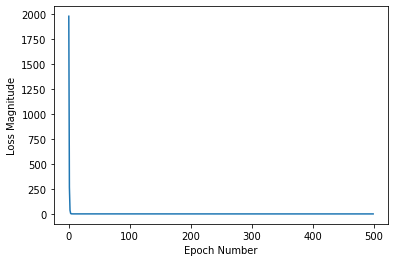

In [24]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Predict new values with our model

Let's now pick a random number for radius and ask our model to predict it's circumference.

We'll try 10.0




In [25]:
print(model.predict([10.0]))

[[62.768448]]


The result 62.8 looks really good. 

The correct answer is  2 × 3.14 × 10.0 = 62.83 , so our model is doing really well.

Our model can now correctly provide the circumference of any circle, given it's radius.